# stock price prediction  and forecasting 

## 1. collecting the data from APPLE
## 2. preprocessing the data - train and test
## 3. creating the stacked LSTM model
## 4. predicting the test data and plotting the output
## 5. forecasting for next 30 days and plotting the output

In [1]:
!pip install pandas-datareader



In [2]:
import pandas_datareader as pdr

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key = '66bc11c42ffabc5e084f23ef2d74256f9d33a226')

/var/folders/tr/v69rrvdd54sglfkjf3yp5l7c0000gn/T/ipykernel_30140/4201774889.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key = '66bc11c42ffabc5e084f23ef2d74256f9d33a226')


In [4]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2019-10-01 00:00:00+00:00  224.59  228.22  224.20  225.07  36187163   
       2019-10-02 00:00:00+00:00  218.96  223.58  217.93  223.06  35767257   
       2019-10-03 00:00:00+00:00  220.82  220.96  215.13  218.43  30352686   
       2019-10-04 00:00:00+00:00  227.01  227.49  223.89  225.64  34755553   
       2019-10-07 00:00:00+00:00  227.06  229.93  225.84  226.27  30889269   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2019-10-01 00:00:00+00:00  54.333669  55.211852  54.239318  54.449792   
       2019-10-02 00:00:00+00:00  52.971638  54.089326  52.722456  53.963525   
       2019-10-03 00:00:00+00:00  53.421616  53.455485  52.045069  52.843418   
       2019-10-04 00:00:00+00:00  54.919124  55.035248  54.164322  54.587689   
       2019-10-07 00:00:00+00:00  54.931221  55.625542  54.636074  54.740101   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2019-10-01 00:00:00+00:00  144748652      0.0          1.0  
       2019-10-02 00:00:00+00:00  143069028      0.0          1.0  
       2019-10-03 00:00:00+00:00  121410744      0.0          1.0  
       2019-10-04 00:00:00+00:00  139022212      0.0          1.0  
       2019-10-07 00:00:00+00:00  123557076      0.0          1.0

In [5]:
df.to_csv('AAPL.csv')

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('/Users/shivakumargoudmucharla/AAPL.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-10-01 00:00:00+00:00,224.59,228.22,224.20,225.07,36187163,54.333669,55.211852,54.239318,54.449792,144748652,0.0,1.0
1,AAPL,2019-10-02 00:00:00+00:00,218.96,223.58,217.93,223.06,35767257,52.971638,54.089326,52.722456,53.963525,143069028,0.0,1.0
2,AAPL,2019-10-03 00:00:00+00:00,220.82,220.96,215.13,218.43,30352686,53.421616,53.455485,52.045069,52.843418,121410744,0.0,1.0
3,AAPL,2019-10-04 00:00:00+00:00,227.01,227.49,223.89,225.64,34755553,54.919124,55.035248,54.164322,54.587689,139022212,0.0,1.0
4,AAPL,2019-10-07 00:00:00+00:00,227.06,229.93,225.84,226.27,30889269,54.931221,55.625542,54.636074,54.740101,123557076,0.0,1.0


In [9]:
df1 = df.reset_index()['close']

In [10]:
df1.shape

(1257,)

In [11]:
import matplotlib.pyplot as plt

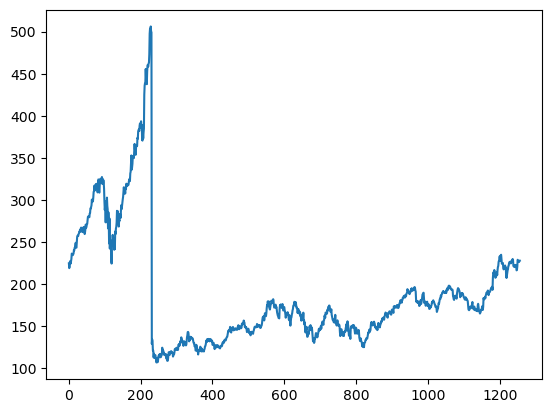

In [12]:
plt.plot(df1)

In [13]:
## LSTM is very sensitive so applying the MinMax scalar

In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))


In [16]:
df1.shape

(1257, 1)

In [17]:
df1

array([[0.29492799],
       [0.28082655],
       [0.28548528],
       ...,
       [0.29938635],
       [0.30226675],
       [0.30294302]])

In [18]:
# splitting the data into training and testing
training_size = int(len(df1)*0.65)
testing_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size, testing_size

(817, 440)

In [20]:
import numpy
def create_dataset(dataset , time_step = 1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)    

In [21]:
time_step = 100
x_train,y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [22]:
print(x_train.shape)
print(y_train.shape)

(716, 100)
(716,)


In [23]:
print(x_test.shape)
print(y_test.shape)

(339, 100)
(339,)


In [25]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [26]:
print(x_train.shape)
print(y_train.shape)

(716, 100, 1)
(716,)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model = Sequential()
model.add(LSTM(50,return_sequences= True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')        

/Users/shivakumargoudmucharla/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs=100,batch_size =64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0519 - val_loss: 0.0029
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0181 - val_loss: 5.7878e-04
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0120 - val_loss: 0.0021
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0096 - val_loss: 4.0100e-04
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0090 - val_loss: 3.1869e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0067 - val_loss: 4.4276e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0068 - val_loss: 8.8589e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0078 - val_loss: 0.0030
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0060 - val_loss: 3.6337e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0068 - val_loss: 8.7485e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0039 - val_loss: 5.8382e-04
Epoch 12/100
12/12 ━

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0023 - val_loss: 2.2256e-04
Epoch 67/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0016 - val_loss: 2.0513e-04
Epoch 68/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0013 - val_loss: 2.6609e-04
Epoch 69/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 8.3971e-04 - val_loss: 3.4362e-04
Epoch 70/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0011 - val_loss: 2.1450e-04
Epoch 71/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0013 - val_loss: 2.1868e-04
Epoch 72/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0014 - val_loss: 2.0570e-04
Epoch 73/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 9.1066e-04 - val_loss: 2.0263e-04
Epoch 74/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0012 - val_loss: 2.5288e-04
Epoch 75/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0010 - val_loss: 2.8113e-04
Epoch 76/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0018 - val_loss: 2.7611e-04
Epo

In [31]:
import tensorflow as tf

In [32]:
tf.__version__

'2.16.1'

In [33]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [38]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [40]:
import math
from sklearn.metrics import mean_squared_error
# RMSE of test data
math.sqrt(mean_squared_error(y_test,test_predict))

194.31968962120982

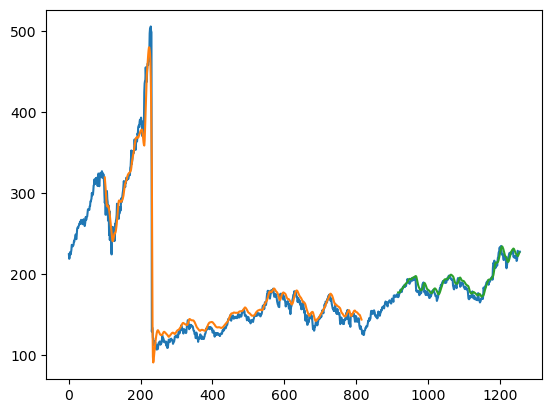

In [42]:
# plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back , :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1 , :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
len(test_data)

440

In [44]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [47]:
temp_input

[0.189254852849092,
 0.19010644959298684,
 0.1946900438321853,
 0.19088290544771447,
 0.19897307451471502,
 0.20185347526612396,
 0.207589229805886,
 0.20788979336255475,
 0.20796493425172197,
 0.2108954289292423,
 0.21417658108954285,
 0.2105447714464621,
 0.2004758922980588,
 0.20824045084533493,
 0.2082654978083907,
 0.20901690670006257,
 0.2115216030056355,
 0.21392611145898555,
 0.2183844708829054,
 0.2191859737006887,
 0.22299311208515965,
 0.21951158422041323,
 0.22554790231684402,
 0.216105197244834,
 0.25124608641202256,
 0.2660738885410144,
 0.26900438321853476,
 0.2646211646837821,
 0.275090795241077,
 0.26912961803381336,
 0.2575829680651221,
 0.25209768315591735,
 0.25372573575453966,
 0.25605510331872255,
 0.26652473387601744,
 0.26865372573575447,
 0.2599373825923606,
 0.27529117094552286,
 0.2841077019411396,
 0.287313713212273,
 0.29931120851596743,
 0.30301815904821533,
 0.3051721978710081,
 0.3159423919849717,
 0.3023919849718221,
 0.30983093299937375,
 0.31949906073

In [52]:
from numpy import array
lst_output = []
n_steps = 100
i = 0
while (i<30):
    if (len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day_input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        
        yhat = model.predict(x_input, verbose=0)

        print("{} day_input {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat[0].tolist()) 
        i = i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)

        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat[0].tolist())
        i = i+1
print(lst_output)        
        

[0.3047482]
101
1 day_input [0.19010645 0.19469004 0.19088291 0.19897307 0.20185348 0.20758923
 0.20788979 0.20796493 0.21089543 0.21417658 0.21054477 0.20047589
 0.20824045 0.2082655  0.20901691 0.2115216  0.21392611 0.21838447
 0.21918597 0.22299311 0.21951158 0.2255479  0.2161052  0.25124609
 0.26607389 0.26900438 0.26462116 0.2750908  0.26912962 0.25758297
 0.25209768 0.25372574 0.2560551  0.26652473 0.26865373 0.25993738
 0.27529117 0.2841077  0.28731371 0.29931121 0.30301816 0.3051722
 0.31594239 0.30239198 0.30983093 0.31949906 0.32055103 0.30567314
 0.29390106 0.29422668 0.29335003 0.29597996 0.27977458 0.27714465
 0.27832185 0.27902317 0.2804258  0.2886412  0.27932373 0.28308078
 0.25655604 0.25144646 0.25793363 0.26667502 0.27401378 0.27724483
 0.2866124  0.28773951 0.2952536  0.29858485 0.2981841  0.29973701
 0.29946149 0.29477771 0.30056356 0.30141515 0.30354415 0.29968691
 0.30795241 0.3059737  0.29036944 0.28556043 0.28939261 0.28548528
 0.28571071 0.28370695 0.29009393 0

8 day_input [[0.32020873]]
9 day_input [0.21089543 0.21417658 0.21054477 0.20047589 0.20824045 0.2082655
 0.20901691 0.2115216  0.21392611 0.21838447 0.21918597 0.22299311
 0.21951158 0.2255479  0.2161052  0.25124609 0.26607389 0.26900438
 0.26462116 0.2750908  0.26912962 0.25758297 0.25209768 0.25372574
 0.2560551  0.26652473 0.26865373 0.25993738 0.27529117 0.2841077
 0.28731371 0.29931121 0.30301816 0.3051722  0.31594239 0.30239198
 0.30983093 0.31949906 0.32055103 0.30567314 0.29390106 0.29422668
 0.29335003 0.29597996 0.27977458 0.27714465 0.27832185 0.27902317
 0.2804258  0.2886412  0.27932373 0.28308078 0.25655604 0.25144646
 0.25793363 0.26667502 0.27401378 0.27724483 0.2866124  0.28773951
 0.2952536  0.29858485 0.2981841  0.29973701 0.29946149 0.29477771
 0.30056356 0.30141515 0.30354415 0.29968691 0.30795241 0.3059737
 0.29036944 0.28556043 0.28939261 0.28548528 0.28571071 0.28370695
 0.29009393 0.29036944 0.28969317 0.27421415 0.27539136 0.28515967
 0.30564809 0.30396994 0.2

16 day_input [[0.33722767]]
17 day_input [0.21392611 0.21838447 0.21918597 0.22299311 0.21951158 0.2255479
 0.2161052  0.25124609 0.26607389 0.26900438 0.26462116 0.2750908
 0.26912962 0.25758297 0.25209768 0.25372574 0.2560551  0.26652473
 0.26865373 0.25993738 0.27529117 0.2841077  0.28731371 0.29931121
 0.30301816 0.3051722  0.31594239 0.30239198 0.30983093 0.31949906
 0.32055103 0.30567314 0.29390106 0.29422668 0.29335003 0.29597996
 0.27977458 0.27714465 0.27832185 0.27902317 0.2804258  0.2886412
 0.27932373 0.28308078 0.25655604 0.25144646 0.25793363 0.26667502
 0.27401378 0.27724483 0.2866124  0.28773951 0.2952536  0.29858485
 0.2981841  0.29973701 0.29946149 0.29477771 0.30056356 0.30141515
 0.30354415 0.29968691 0.30795241 0.3059737  0.29036944 0.28556043
 0.28939261 0.28548528 0.28571071 0.28370695 0.29009393 0.29036944
 0.28969317 0.27421415 0.27539136 0.28515967 0.30564809 0.30396994
 0.29963682 0.30189105 0.29938635 0.30226675 0.30294302 0.30474821
 0.30659804 0.30839881 0

25 day_input [[0.35494438]]
26 day_input [0.26900438 0.26462116 0.2750908  0.26912962 0.25758297 0.25209768
 0.25372574 0.2560551  0.26652473 0.26865373 0.25993738 0.27529117
 0.2841077  0.28731371 0.29931121 0.30301816 0.3051722  0.31594239
 0.30239198 0.30983093 0.31949906 0.32055103 0.30567314 0.29390106
 0.29422668 0.29335003 0.29597996 0.27977458 0.27714465 0.27832185
 0.27902317 0.2804258  0.2886412  0.27932373 0.28308078 0.25655604
 0.25144646 0.25793363 0.26667502 0.27401378 0.27724483 0.2866124
 0.28773951 0.2952536  0.29858485 0.2981841  0.29973701 0.29946149
 0.29477771 0.30056356 0.30141515 0.30354415 0.29968691 0.30795241
 0.3059737  0.29036944 0.28556043 0.28939261 0.28548528 0.28571071
 0.28370695 0.29009393 0.29036944 0.28969317 0.27421415 0.27539136
 0.28515967 0.30564809 0.30396994 0.29963682 0.30189105 0.29938635
 0.30226675 0.30294302 0.30474821 0.30659804 0.30839881 0.31022012
 0.31209606 0.31403783 0.31604353 0.31810451 0.32020873 0.32234338
 0.32449535 0.32665268

In [54]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [55]:
import matplotlib.pyplot as plt

In [56]:
len(df1)

1257

In [61]:
df3 = df1.tolist()
df3.extend(lst_output)

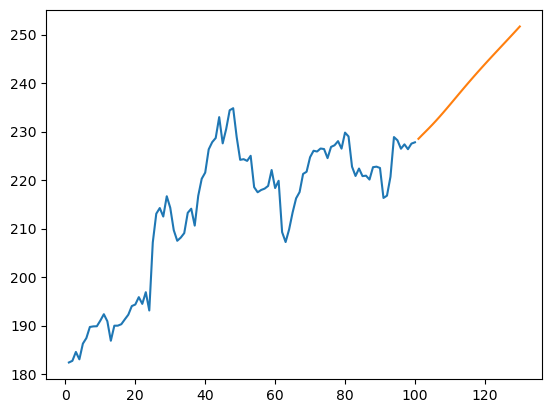

In [65]:
plt.plot(day_new, scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred, scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)))
